In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [23]:
authors = pd.read_csv('authors_all.csv', encoding = 'utf-8', sep = ";")

In [36]:
authors.head()

,Id artist,name,name extended,type,Birth year,Death year,Birth city,Birth state,Birth country,Death city,Death state,Death country,Gender,Nationality (original),ID artworks,average_year,artworks_creation_years,acquisition_year,Year_First_Acquisition,Age_First_Acquisition
0,380000000034856,& IL TOPO,Aujourd’hui & IL TOPO réunit : Armando della V...,groupe,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,groupe,NaN,380000000034695|380000000035465,2015.0,2015|2015,2017|2017,2017.0,NaN
1,6664664,(À L'EMBALLAGE DE CLÉMENTINE),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,280000000115916,NaN,NaN,NaN,NaN,NaN
2,6663648,(D'APRÈS),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,540000000000477|540000000000478|54000000000047...,1959.0,1959|1959|1959|1959|1959|1959|1959|1959|1959|1...,1969|1969|1969|1969|1969|1969|1969|1969|1969|1...,1969.0,NaN
3,6660426,(INSCRIPTIONS INTRAN STUDIO),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,480000000000233,NaN,NaN,2005,2005.0,NaN
4,6660563,(PABLO PICASSO (D'APRÈS)),NaN,anonyme,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160000000001109|160000000105183|160000000105186,1959.0,1948|1962|1967,1979|1991|1991,1979.0,NaN


In [6]:
authors['Id artist'] = authors['Id artist'].astype(str)

In [7]:
authors['type'].value_counts()

artiste        33722
anonyme         1446
groupe           666
attribution      124
Name: type, dtype: int64

In [25]:
#create new column for later calculations
authors.insert(loc = authors.shape[1], column ='Year_First_Acquisition', value = np.nan)

In [27]:
#create new column for later calculations
authors.insert(loc = authors.shape[1], column ='Age_First_Acquisition', value = np.nan)

In [32]:
#find first acquisition
for i in range(authors.shape[0]):
    if (i in authors.index):
        if(authors.loc[i].acquisition_year is not np.nan):
            year = min(authors.loc[i].acquisition_year.split('|'))
            authors.at[i, 'Year_First_Acquisition']= year

In [35]:
#find age at first acquisition
for i in range(authors.shape[0]):
    if (i in authors.index):
        if((authors.loc[i].Year_First_Acquisition is not np.nan) & (authors.loc[i]['Birth year'] is not np.nan)):
            age = authors.loc[i].Year_First_Acquisition - authors.loc[i]['Birth year']
            authors.at[i, 'Age_First_Acquisition']= age

In [40]:
# Exclude mistakes and authors before 1900
authors_sub = authors[(authors['Age_First_Acquisition']>17)&(authors['Age_First_Acquisition']<100)&(authors['average_year']>1900)]

In [51]:
all = authors_sub.Age_First_Acquisition.notna().value_counts().sum()

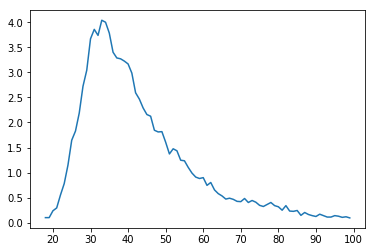

In [52]:
plt.plot(authors_sub.Age_First_Acquisition.value_counts().sort_index()/all*100)

In [55]:
authors_sub[authors_sub.Gender == 'féminin']['Age_First_Acquisition'].value_counts().head()


32.0    173
34.0    173
31.0    168
35.0    166
33.0    164
Name: Age_First_Acquisition, dtype: int64

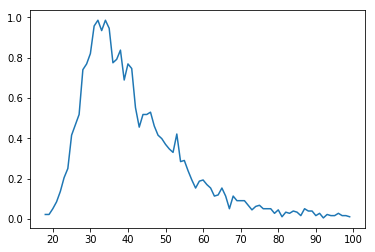

In [57]:
plt.plot(authors_sub[authors_sub.Gender == 'féminin']['Age_First_Acquisition'].value_counts().sort_index()/all*100)

In [56]:
authors_sub[authors_sub.Gender == 'masculin']['Age_First_Acquisition'].value_counts().head()

33.0    543
34.0    527
31.0    509
30.0    499
35.0    494
Name: Age_First_Acquisition, dtype: int64

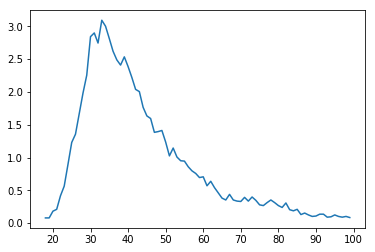

In [58]:
plt.plot(authors_sub[authors_sub.Gender == 'masculin']['Age_First_Acquisition'].value_counts().sort_index()/all*100)